# 📅 Week 4: Forecasting with Prophet

## Step 1: Load Data

In [2]:
import pandas as pd

#Skip first 2 rows to remove junk headers like "Price" and "Ticker"
data = pd.read_csv('../data/raw/AAPL_stock.csv', skiprows=2)

#Rename proper date and value columns
data.rename(columns={data.columns[0]: 'ds', data.columns[1]: 'y'}, inplace=True)

#Convert 'ds' to datetime
data['ds'] = pd.to_datetime(data['ds'])

data = data[['ds', 'y']]
data.tail()


,ds,y
2258,2023-12-22,192.192566
2259,2023-12-26,191.646545
2260,2023-12-27,191.745834
2261,2023-12-28,192.172699
2262,2023-12-29,191.130310


## Step 2: Install and Import Prophet

In [3]:

from prophet import Prophet

## Step 3: Fit Prophet Model

In [17]:
print(data.columns)
data.head()


Index(['ds', 'y'], dtype='object')


,ds,y
0,2015-01-05,23.604336
1,2015-01-06,23.606550
2,2015-01-07,23.937572
3,2015-01-08,24.857307
4,2015-01-09,24.883963


In [20]:
df = data.copy()
# Initialize and fit the model
model = Prophet(daily_seasonality=True)
model.fit(df)

06:49:33 - cmdstanpy - INFO - Chain [1] start processing
06:49:33 - cmdstanpy - INFO - Chain [1] done processing


## Step 4: Forecast Next 30 Days

In [21]:
# Create future dataframe
future = model.make_future_dataframe(periods=30)

# Forecast
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2288,2024-01-24,176.500535,166.145070,186.858937
2289,2024-01-25,176.655098,165.905820,186.921527
2290,2024-01-26,176.829724,166.463555,187.557072
2291,2024-01-27,176.487446,165.397892,186.408867
2292,2024-01-28,176.745451,165.922561,186.944261


## Step 5: Plot the Forecast

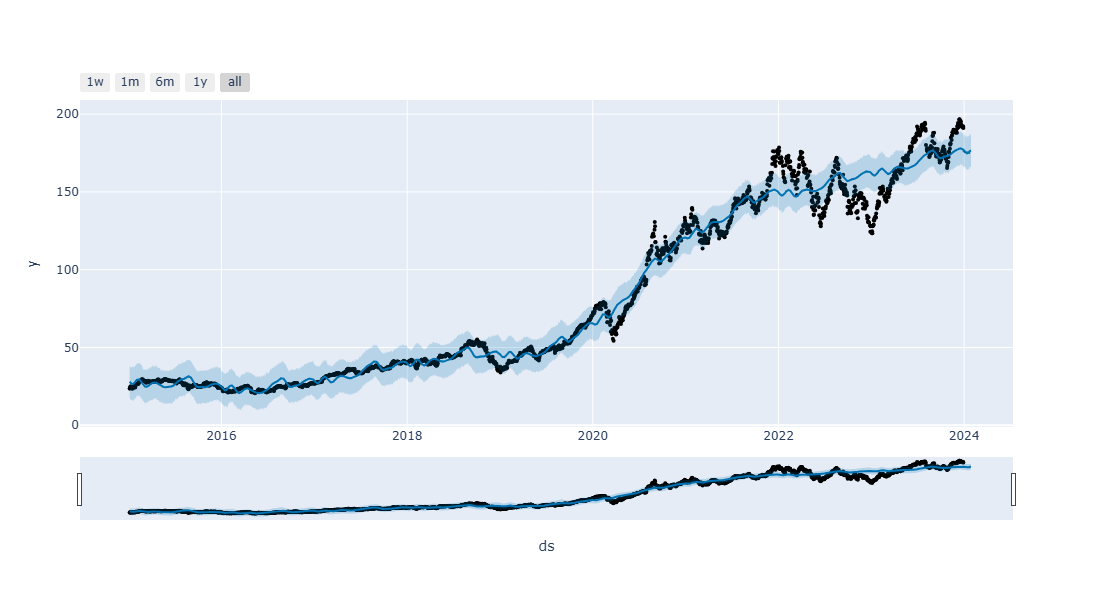

In [22]:
from prophet.plot import plot_plotly

plot_plotly(model, forecast)

## Step 6: Evaluate Forecast Accuracy (RMSE)

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Get actual vs predicted for last 30 days
actual = data['y'][-30:].reset_index(drop=True)
predicted = forecast['yhat'][-30:].reset_index(drop=True)

rmse = np.sqrt(mean_squared_error(actual, predicted))
print("RMSE:", rmse)

RMSE: 16.01744712598191


In [25]:
from sklearn.metrics import mean_squared_error
import os, numpy as np

# Predicted values
predicted_prices = forecast[['ds', 'yhat']].set_index('ds').iloc[-30:]['yhat']

# Actual values: last 30 from original data
actual_prices = df.set_index('ds').iloc[-30:]['y']

# Save
os.makedirs("../data/predictions", exist_ok=True)
np.save("../data/predictions/prophet_pred.npy", predicted_prices)
np.save("../data/predictions/prophet_actual.npy", actual_prices)

# RMSE
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print("✅ Prophet RMSE (actual):", rmse)



✅ Prophet RMSE (actual): 16.01744712598191


## Summary

- Used Facebook Prophet for forecasting AAPL stock prices.
- Data formatted into 'ds' (date) and 'y' (closing price).
- Forecasted the next 30 days.
- Visualized the forecast with upper/lower confidence bands.
- RMSE (Root Mean Squared Error): **16.01**

Prophet handled seasonality and trends smoothly. 
